In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fmin,fmin_bfgs,basinhopping,fmin_powell

In [248]:
ex2data1 = pd.read_csv("ex2data1.txt",header=None,names=['exam1','exam2','admitted'])
ex2data1['pad'] =1
num_samples = ex2data1.shape[0]
print(num_samples)

100


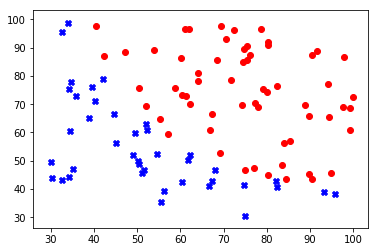

In [249]:
plt.scatter(ex2data1[ex2data1.admitted == True]['exam1'],
            ex2data1[ex2data1.admitted == True]['exam2'],
            color='red')
plt.scatter(ex2data1[ex2data1.admitted == False]['exam1'],
            ex2data1[ex2data1.admitted == False]['exam2'],
            color='blue',marker="X")

In [245]:
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

In [246]:
def h(theta,x):
    return sigmoid(x.dot(theta))

In [256]:
y_array = ex2data1['admitted'].values
X_array = ex2data1[['pad','exam1','exam2']].values

In [281]:
def cost(theta,X,y):
    return 1/num_samples*(-y.dot(np.log(h(theta,X))) - (1-y).dot(np.log1p(-h(theta,X))))

In [282]:
cost(np.zeros(3),X_array,y_array)

0.6931471805599453

In [273]:
def gradient(theta):
    return 1/num_samples*(y_array - h(theta,X_array)).dot(X_array)

In [283]:
theta_min = fmin(lambda z: cost(z,X_array,y_array),np.zeros(3),maxiter=400)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [289]:
def predict(theta,X):
    return np.ceil(h(theta,X)-0.5)

In [345]:
accuracy = np.sum(np.isclose(predict(theta_min,X_array),y_array).astype(int))/num_samples
accuracy

0.89

Decision boundary is given by $\hat\theta_0 + \hat\theta_1 x_1 + \hat\theta_2 x_2 = 0$, where $\hat\theta = \text{argmin}\, J(\mathbf{\theta})$

In [347]:
x_bdry = np.arange(30,100)
y_bdry = -1/theta_min[2]*(theta_min[0] + theta_min[1]*x_vals)

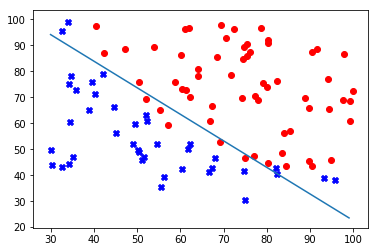

In [348]:
plt.scatter(ex2data1[ex2data1.admitted == True]['exam1'],
            ex2data1[ex2data1.admitted == True]['exam2'],
            color='red')
plt.scatter(ex2data1[ex2data1.admitted == False]['exam1'],
            ex2data1[ex2data1.admitted == False]['exam2'],
            color='blue',marker="X")
plt.plot(x_bdry,y_bdry)

In [349]:
def cost_reg(theta,X,y,reg_lambda):
    log_loss = -y.dot(np.log(h(theta,X))) - (1-y).dot(np.log1p(-h(theta,X)))
    reg_term = 0.5*reg_lambda*np.sum(theta[1:])
    return 1/num_samples*(log_loss + reg_term)

In [350]:
theta_min_reg = fmin(lambda z: cost_reg(z,X_array,y_array,1),np.zeros(3),maxiter=400)

Optimization terminated successfully.
         Current function value: 0.205525
         Iterations: 171
         Function evaluations: 305
